# 교차검증 모델 만들기

In [7]:
from sklearn import datasets, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [11]:
digits = datasets.load_digits()
features = digits.data
target = digits.target
scaler = StandardScaler()
model = LogisticRegression()
pipeline = make_pipeline(scaler, model)
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(pipeline, features, target, cv=kf, scoring='accuracy', n_jobs=-1)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

In [12]:
cv_results.mean()

0.9693916821849783

In [13]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=1)

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
pipeline = make_pipeline(scaler, model)

In [18]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [19]:
cv_results = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

In [21]:
cv_results.mean()

0.9617424242424242

In [22]:
from sklearn.model_selection import ShuffleSplit

In [23]:
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

In [24]:
cv_results = cross_val_score(pipeline, features, target, cv=ss, scoring='accuracy', n_jobs=-1)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [25]:
cv_results.mean()

0.9630555555555554

In [26]:
from sklearn.model_selection import RepeatedKFold

In [27]:
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

In [28]:
cv_results = cross_val_score(pipeline, features, target, cv=rfk, scoring='accuracy', n_jobs=-1)
cv_results.mean()

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

0.9695065176908755

In [29]:
len(cv_results)

50

# 기본 회귀 모델 만들기

In [32]:
import pandas as pd

df = pd.read_csv('./datasets/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
X = df.drop(columns='medv')
y = df['medv']

In [35]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)

DummyRegressor()

In [37]:
dummy.score(X_test, y_test)

-0.0005790551481519302

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [40]:
ols.score(X_test, y_test)

0.7416596307794123

In [43]:
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(X_train, y_train)

DummyRegressor(constant=20, strategy='constant')

In [44]:
clf.score(X_test, y_test)

-0.10512847150882987

In [46]:
clf.predict(X_test)

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20])

# 기본 분류 모델 만들기

In [52]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

In [56]:
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.2

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9666666666666667

In [63]:
dummy = DummyClassifier(strategy='most_frequent', random_state=1)
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.2

In [68]:
dummy.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
import numpy as np
pd.Series(y_train).value_counts()

2    44
0    39
1    37
dtype: int64

# 이진 분류기의 예측 평가하기

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [72]:
X, y = make_classification(n_samples= 10000, n_features = 3, n_informative=3, 
                           n_redundant=0, n_classes=2, random_state=1)

In [74]:
model = LogisticRegression()
cross_val_score(model, X, y, scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [77]:
cross_val_score(model, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [78]:
cross_val_score(model, X, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [79]:
cross_val_score(model, X, y, scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [83]:
model = LogisticRegression()
y_pred = model.fit(X_train, y_train).predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.954

In [86]:
from sklearn.model_selection import cross_validate

In [87]:
cross_validate(model, X, y, scoring=['accuracy', 'precision'])

{'fit_time': array([0.01147366, 0.01224661, 0.01271605, 0.01226497, 0.02982402]),
 'score_time': array([0.00367808, 0.00357842, 0.00360894, 0.00363541, 0.00385022]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

# 이진 분류기 임곗값 평가하기

In [100]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [94]:
X, y = make_classification(n_samples=10000,n_features=10, n_classes=2, n_informative=3, random_state=3)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [96]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_test_proba = model.predict_proba(X_test)[:, 1]

In [98]:
fpr, tpr, threshold = roc_curve(y_test, y_test_proba)

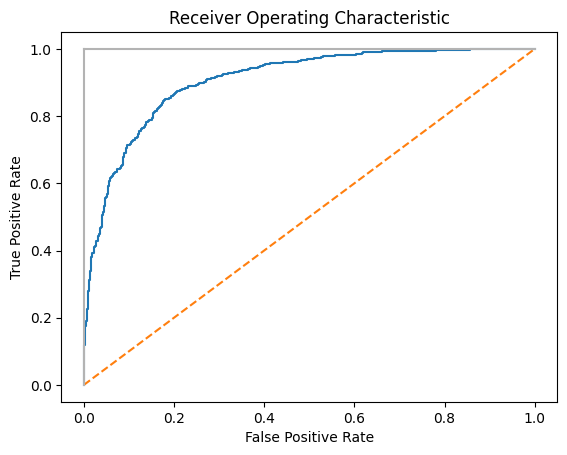

In [101]:
# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [102]:
model.classes_

array([0, 1])

In [104]:
threshold[115], tpr[115], fpr[115]

(0.7625550717745188, 0.6288866599799399, 0.06679960119641076)

In [105]:
threshold[45], tpr[45], fpr[45]

(0.8921412599174249, 0.4112337011033099, 0.023928215353938187)

In [106]:
roc_auc_score(y_test, y_test_proba)

0.9060171541543875

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
precision, recall, threshold = roc_curve(y_test, y_test_proba)

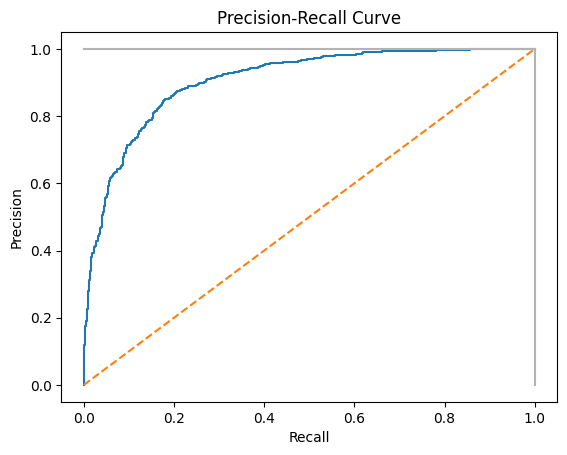

In [109]:
# ROC 곡선을 그립니다.
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0, 1], ls="--")
plt.plot([1, 1], c=".7"), plt.plot([1, 1], [1, 0] , c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [110]:
from sklearn.metrics import average_precision_score

In [111]:
average_precision_score(y_test, y_test_proba)

0.9012156659359343

In [112]:
cross_validate(model, X, y, scoring=['roc_auc', 'average_precision'])

{'fit_time': array([0.01050186, 0.01161718, 0.01090503, 0.01228762, 0.01212525]),
 'score_time': array([0.00425005, 0.00406933, 0.00407505, 0.00406194, 0.0040791 ]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

# 다중 클래스 분류기 예측 평가기

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [115]:
X, y = make_classification(n_samples=10000,n_features=3, n_classes=3, n_informative=3, random_state=3, n_redundant=0)

In [116]:
model = LogisticRegression()
cross_val_score(model, X, y, scoring='accuracy')

array([0.7205, 0.718 , 0.7245, 0.728 , 0.7155])

In [119]:
cross_val_score(model, X, y, scoring='f1_macro')

array([0.72114083, 0.7192514 , 0.7249127 , 0.72827024, 0.71543722])

In [120]:
cross_val_score(model, X, y, scoring='f1_weighted')

array([0.72118734, 0.71930914, 0.72501119, 0.72833524, 0.71550323])

In [121]:
cross_val_score(model, X, y, scoring='f1_micro')

array([0.7205, 0.718 , 0.7245, 0.728 , 0.7155])

# 분류기 성능 시각화하기

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [126]:
iris = datasets.load_iris()

In [127]:
X, y = iris.data, iris.target

In [128]:
class_names = iris.target_names

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

In [131]:
model = LogisticRegression()
y_pred = model.fit(X_train, y_train).predict(X_test)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
matrix = confusion_matrix(y_test, y_pred)

In [134]:
df = pd.DataFrame(matrix, columns=class_names, index=class_names)
df

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,12,1
virginica,0,0,6


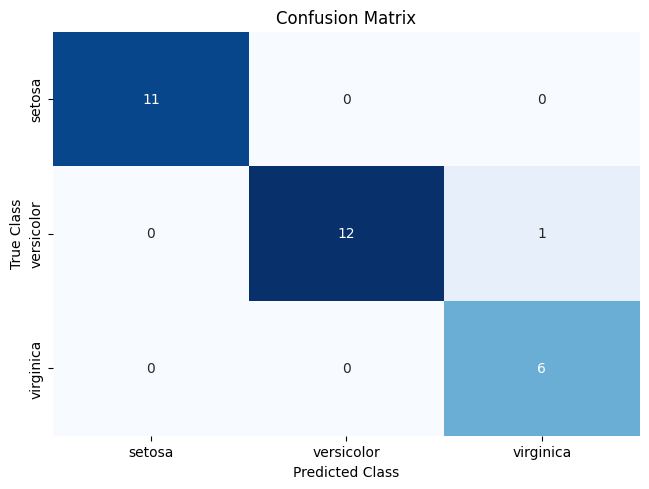

In [135]:
sns.heatmap(df, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# 회귀 모델 평가하기

In [139]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=3, n_informative = 3, n_targets =1, noise=50, coef=False, random_state=1)

In [140]:
model = LinearRegression()
cross_val_score(model,X, y, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [141]:
cross_val_score(model,X, y, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

# 군집 모델 평가하기

In [147]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1000, n_features = 10, centers=2, cluster_std = 0.5, shuffle=True, random_state=1)

In [148]:
model = KMeans(n_clusters=2, random_state=1).fit(X)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
y_pred = model.labels_

In [151]:
silhouette_score(X, y_pred)

0.8916265564072141

In [152]:
silhouette_score(X, y)

0.8916265564072141

# 사용자 정의 평가 지표 만들기

In [160]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

In [161]:
X, y = make_regression(n_samples=100, n_features=3, random_state=1)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [163]:
def custom_metrics(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

In [164]:
score = make_scorer(custom_metrics, greater_is_better=True)

In [165]:
classifier=Ridge()

In [166]:
model = classifier.fit(X_train, y_train)

In [168]:
score(model, X_test, y_test)

0.9997043988696168

In [170]:
y_pred = model.predict(X_test)

In [171]:
r2_score(y_test, y_pred)

0.9997043988696168

# 훈련 세트 크기에 따른 영향을 시각화

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

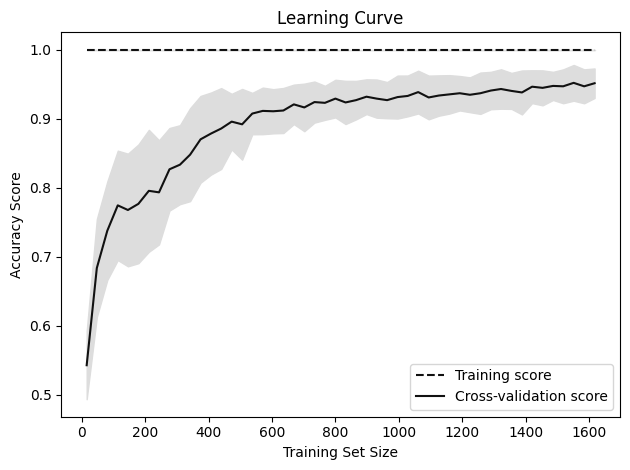

In [177]:
# 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# 데이터를 로드합니다.
digits = load_digits()

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = digits.data, digits.target

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수를 계산합니다.
train_sizes, train_scores, test_scores = learning_curve(# 분류기
                                                        RandomForestClassifier(),
                                                        # 특성 행렬
                                                        features,
                                                        # 타깃 벡터
                                                        target,
                                                        # 폴드 수
                                                        cv=10,
                                                        # 성능 지표
                                                        scoring='accuracy',
                                                        # 모든 코어 사용
                                                        n_jobs=-1,
                                                        # 50개의 훈련 세트 크기
                                                       train_sizes=np.linspace(
                                                       0.01,
                                                       1.0,
                                                       50))

# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프를 그립니다.
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역을 그립니다.
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

# 그래프를 출력합니다.
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 평가 지표 리포트 만들기

In [178]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 타깃 클래스 이름의 리스트를 만듭니다.
class_names = iris.target_names

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression(max_iter=1000)

# 모델을 훈련하고 예측을 만듭니다.
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# 분류 리포트를 만듭니다.
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# 하이퍼파라미터 값의 영향을 시각화

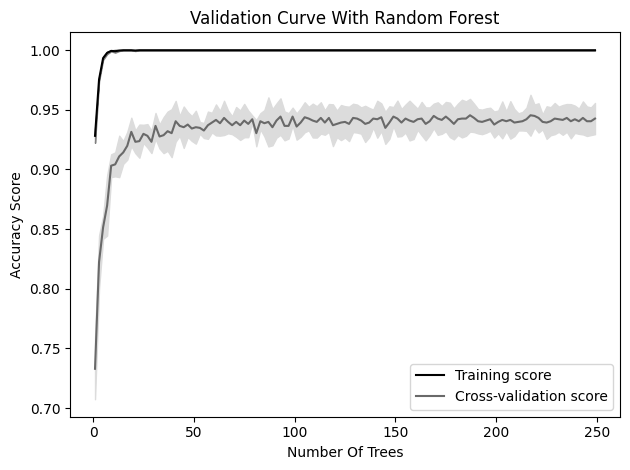

In [179]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 데이터를 로드합니다.
digits = load_digits()

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = digits.data, digits.target

# 파라미터 값의 범위를 만듭니다.
param_range = np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 훈련 세트와 테스트 세트의 정확도를 계산합니다.
train_scores, test_scores = validation_curve(
    # 분류기
    RandomForestClassifier(),
    # 특성 행렬
    features,
    # 타깃 벡터
    target,
    # 조사할 하이퍼파라미터
    param_name="n_estimators",
    # 하이퍼파라미터 값의 범위
    param_range=param_range,
    # 폴드 수
    cv=3,
    # 성능 지표
    scoring="accuracy",
    # 모든 코어 사용
    n_jobs=-1)

# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로 그립니다.
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# 훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로 그립니다.
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# 그래프를 출력합니다.
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()